# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
url = 'https://raw.githubusercontent.com/DS3001/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv'
abnb = pd.read_csv(url, low_memory=False)
print(abnb.shape)
abnb.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [15]:
price = abnb['Price'] # focusing on variable 'price'
price.unique() # retrieiving unique values from list

price = price.str.replace(",", "") # removing commas in numbers four digits and above to improve searchability
print(price.unique(), '\n')

price = pd.to_numeric(price, errors='coerce') # all values converted to numbers, those incorrectly formatted made NaN
print(price.unique(), '\n')

missing_vals = sum(price.isnull()) # totalling missing values
print(f"Missing values in Price column: {missing_vals}")

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

In [12]:
abnb['Price'] = price
del price

In order to improve the quality of the data, it was imperative that I cleaned the 'price' variable. I first removed the commas in numbers four digits and above to improve the accessibility of the data. I then ensured that all the values were converted to numbers and that non-conforming values were converted to NaN, meaning 'Not a Number.' Finally, I totalled the missing values, finding it equalled zero, meaning there all values are present.

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

In [19]:
url = 'https://raw.githubusercontent.com/deancuva/wrangling/main/assignment/data/mn_police_use_of_force.csv'
mn_police = pd.read_csv(url, low_memory=False)
print(mn_police.shape)
mn_police.head()


(12925, 13)


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [30]:
si = mn_police['subject_injury'] # focusing on variable 'subject injury'
print("Unique values for 'subject_injury':", si.unique())
print("\nValue counts (including NaN):")
print(si.value_counts(dropna=False))

missing_count = si.isna().sum()
total = len(si)
prop_missing = missing_count / total
print(f"Number of missing values: {missing_count}")
print(f"Proportion missing: {prop_missing:.2%}")



Unique values for 'subject_injury': [nan 'No' 'Yes']

Value counts (including NaN):
subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
Number of missing values: 9848
Proportion missing: 76.19%


In [27]:
injury_map = {
    'Yes': 'Yes',
    'YES': 'Yes',
    'No': 'No',
    'NO': 'No',

    'UNKNOWN': None,
    'N/A': None
}

mn_police['subject_injury_clean'] = mn_police['subject_injury'].map(injury_map)
print(mn_police['subject_injury_clean'].value_counts(dropna=False))


subject_injury_clean
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64


In [28]:
ctab = pd.crosstab(
    mn_police['subject_injury_clean'],
    mn_police['force_type'],
    dropna=False
)
ctab

pd.crosstab(
    mn_police['subject_injury_clean'],
    mn_police['force_type'],
    normalize='columns'  # or 'index'
)


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,
No,0.0,0.459437,0.761628,1.0,0.428571,0.459459,0.333333,0.043478,0.465839
Yes,1.0,0.540563,0.238372,0.0,0.571429,0.540541,0.666667,0.956522,0.534161


In [29]:
missing_by_force = mn_police.groupby('force_type')['subject_injury_clean'].apply(lambda x: x.isna().mean())
print(missing_by_force.sort_values(ascending=False))


force_type
Less Lethal                    1.000000
Maximal Restraint Technique    1.000000
Chemical Irritant              0.892028
Taser                          0.753634
Bodily Force                   0.747720
Baton                          0.500000
Improvised Weapon              0.500000
Police K9 Bite                 0.402597
Gun Point Display              0.259615
Firearm                        0.000000
Less Lethal Projectile         0.000000
Name: subject_injury_clean, dtype: float64


Through my assessment of the data for 'Subject Injury,' I found that the proportion of values missing was concerning as over 75% of values are missing. It is certainly important to inquire into why so many injuries weren't reported. Additionally, the cross-tabulation shows that injuries are recorded more often for weapons like firearms and tasers, while physical force has more missing values, suggesting inconsistencies in reporting procedures.

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [42]:
url = 'https://raw.githubusercontent.com/deancuva/wrangling/main/justice_data%20(1).parquet'
data1 = pd.read_parquet(url, engine = 'pyarrow')
print(data1.shape, '\n')
data1.head()

(22986, 709) 



,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [43]:
def_released = data1['WhetherDefendantWasReleasedPretrial']
print(def_released.unique())
print(def_released.value_counts())

released = def_released.replace(9, np.nan)
print(def_released.value_counts(),'\n')
missing = sum(def_released.isnull())
print(f"Missing values: {missing}")

[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

Missing values: 0


In [44]:
data1['released'] = def_released
del def_released

4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)


In [ ]:
length = data1`['ImposedSentenceAllChargeInContactEvent']
print(length.unique(),'\n')

In [ ]:
type = data1['SentenceTypeAllChargesAtConvictionInContactEvent']
print(type.value_counts(),'\n')

In [ ]:
length = pd.to_numeric(length, errors = 'coerce')
length_missing = sum(length.isnull())
print(length_missing, '\n')

In [ ]:
length_na = length.isnull()
print(pd.crosstab(length_na, type), '\n')

In [ ]:
length = length.mask(type == 4, 0)
length = length.mask(type == 9, np.nan)

length_na = length.isnull()
print(pd.crosstab(length_na, type), '\n')

length_missing = sum(length.isnull())
print(length_missing, '\n')

In [ ]:
data1['ImposedSentenceAllChargeInContactEvent'] = length
del length, type

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so read_csv won't work.

In [31]:
import pandas as pd

url = 'https://raw.githubusercontent.com/deancuva/wrangling/refs/heads/main/sharks.csv'
sharks = pd.read_csv(url, low_memory=False)
print(sharks.shape)
sharks.head()

(39072, 255)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
0,23-Jan-25,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Jan-25,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-Jan-25,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-Jan-25,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2-Jan-25,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Drop any columns that do not contain data.

In [32]:
sharks_cleaned = sharks.dropna(axis=1, how='all')
sharks_cleaned.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,23-Jan-25,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Jan-25,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-Jan-25,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-Jan-25,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2-Jan-25,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [33]:

sharks['Year'] = pd.to_numeric(sharks['Year'], errors='coerce')

sharks_since_1940 = sharks[(sharks['Year'] >= 1940) & (sharks['Year'] <= pd.Timestamp.now().year)]

attacks_per_year = sharks_since_1940.groupby('Year').size()

if len(attacks_per_year) > 1:
    mid_year = 1980
    early_avg = attacks_per_year[attacks_per_year.index <= mid_year].mean()
    recent_avg = attacks_per_year[attacks_per_year.index > mid_year].mean()

    if recent_avg > early_avg:
        trend = "increased"
    elif recent_avg < early_avg:
        trend = "decreased"
    else:
        trend = "remained constant"

    print("Shark attacks have", trend, "since 1940.")
else:
    print("Insufficient data to determine trend.")





Shark attacks have increased since 1940.


The range of values for the variable 'year' spanned from 1500 to 2025.

4. Clean the Age variable and make a histogram of the ages of the victims.

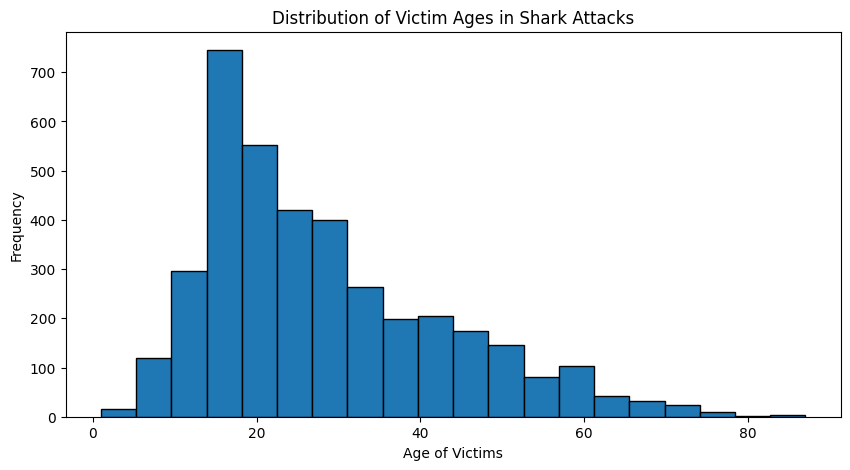

In [56]:
import matplotlib.pyplot as plt

sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce')

sharks_df = sharks.dropna(subset=['Age'])

sharks_df = sharks[(sharks_df['Age'] > 0) & (sharks['Age'] < 120)]

plt.figure(figsize=(10, 5))
plt.hist(sharks_df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age of Victims')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages in Shark Attacks')
plt.show()


5. What proportion of victims are male?

In [57]:
sharks['Sex'] = sharks['Sex'].str.upper().str.strip()

sharks = sharks[sharks['Sex'].isin(['M', 'F'])]

male_count = sharks[sharks['Sex'] == 'M'].shape[0]
known_gender_count = sharks[sharks['Sex'].notna()].shape[0]

male_proportion = male_count / known_gender_count

male_proportion




0.8764044943820225

6. Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [59]:
sharks['Type'] = sharks['Type'].astype(str).str.strip().str.title()

sharks['Type'] = sharks['Type'].apply(lambda x: 'Provoked' if 'Provoked' in x else
                                      ('Unprovoked' if 'Unprovoked' in x else 'Unknown'))

unprovoked_count = sharks[sharks['Type'] == 'Unprovoked'].shape[0]
total_known_type = sharks[sharks['Type'].isin(['Provoked', 'Unprovoked'])].shape[0]
unprovoked_proportion = unprovoked_count / total_known_type if total_known_type > 0 else 0

unprovoked_proportion



0.8959194679129966

7. Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

In [50]:
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].astype(str).str.upper().str.strip()

sharks['Fatal Y/N'] = sharks['Fatal Y/N'].replace({'YES': 'Y', 'NO': 'N'})

sharks['Fatal Y/N'] = sharks['Fatal Y/N'].where(sharks['Fatal Y/N'].isin(['Y', 'N']), "Unknown")

sharks['Fatal Y/N'].unique()

print(sharks['Fatal Y/N'].value_counts())

Fatal Y/N
N          4519
Y          1360
Unknown     529
Name: count, dtype: int64


8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [68]:
import pandas as pd

# 1. Are sharks more likely to launch unprovoked attacks on men or women?
unprovoked_attacks = sharks[sharks['Type'] == 'Unprovoked']
male_unprovoked = unprovoked_attacks[unprovoked_attacks['Sex'] == 'M'].shape[0]
female_unprovoked = unprovoked_attacks[unprovoked_attacks['Sex'] == 'F'].shape[0]

total_males = sharks[sharks['Sex'] == 'M'].shape[0]
total_females = sharks[sharks['Sex'] == 'F'].shape[0]

male_unprovoked_rate = male_unprovoked / total_males if total_males > 0 else 0
import pandas as pd

# 1. Are sharks more likely to launch unprovoked attacks on men or women?
unprovoked_attacks = sharks[sharks['Type'] == 'Unprovoked']
male_unprovoked = unprovoked_attacks[unprovoked_attacks['Sex'] == 'M'].shape[0]
female_unprovoked = unprovoked_attacks[unprovoked_attacks['Sex'] == 'F'].shape[0]

total_males = sharks[sharks['Sex'] == 'M'].shape[0]
total_females = sharks[sharks['Sex'] == 'F'].shape[0]

male_unprovoked_rate = male_unprovoked / total_males if total_males > 0 else 0
female_unprovoked_rate = female_unprovoked / total_females if total_females > 0 else 0

print( "Unprovoked Attack Rate - Male:", male_unprovoked_rate,
    "Unprovoked Attack Rate - Female:", female_unprovoked_rate)

Unprovoked Attack Rate - Male: 0.7681623931623932 Unprovoked Attack Rate - Female: 0.8459595959595959


In [69]:
provoked_attacks = sharks[sharks['Type'] == 'Provoked']
unprovoked_attacks = sharks[sharks['Type'] == 'Unprovoked']

provoked_fatal_rate = provoked_attacks[provoked_attacks['Fatal Y/N'] == 'Y'].shape[0] / provoked_attacks.shape[0] if provoked_attacks.shape[0] > 0 else 0
unprovoked_fatal_rate = unprovoked_attacks[unprovoked_attacks['Fatal Y/N'] == 'Y'].shape[0] / unprovoked_attacks.shape[0] if unprovoked_attacks.shape[0] > 0 else 0

print("Fatal Rate - Provoked Attack:", provoked_fatal_rate,
"Fatal Rate - Unprovoked Attack:", unprovoked_fatal_rate)

Fatal Rate - Provoked Attack: 0.03281519861830743 Fatal Rate - Unprovoked Attack: 0.24097110754414125


In [71]:
male_fatal_rate = sharks[(sharks['Sex'] == 'M') & (sharks['Fatal Y/N'] == 'Y')].shape[0] / total_males if total_males > 0 else 0
male_fatal_rate = sharks[(sharks['Sex'] == 'M') & (sharks['Fatal Y/N'] == 'Y')].shape[0] / total_males if total_males > 0 else 0
female_fatal_rate = sharks[(sharks['Sex'] == 'F') & (sharks['Fatal Y/N'] == 'Y')].shape[0] / total_females if total_females > 0 else 0

print("Fatal Rate - Male Victim:", male_fatal_rate,
    "Fatal Rate - Female Victim:", female_fatal_rate)

Fatal Rate - Male Victim: 0.2207977207977208 Fatal Rate - Female Victim: 0.15151515151515152


I personally find sharks to be very beautiful creatures, but only from afar. I wouldn't swim with them, even if I was protected by a cage.

9. What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

In [72]:
sharks = sharks.rename(columns={'Species ': 'Species'})

sharks['Species'] = sharks['Species'].astype(str).str.lower().str.strip()

white_shark_attacks = sharks[sharks['Species'].str.contains('white', na=False)].shape[0]

known_species_attacks = sharks[sharks['Species'] != ''].shape[0]

white_shark_proportion = white_shark_attacks / known_species_attacks if known_species_attacks > 0 else 0

white_shark_proportion


0.10268834010628321

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?


This paper is about how to make cleaning data more efficient, as it can be a very time consuming process. Specifically, the paper aims to address data tidying as a small but crucial component of the overall data cleaning process. It also proposes a framework that will notionally make it easier to complete this step, as well as facilitating the proliferation of more tools for the input and output of tidy datasets.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  

The tidy data standard intends on accomplishing a baseline from which the initial exploration and analysis of the data can take place. Additionally, it is meant to reduce the effort required to produce tools for data analysis that are complementary.

3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  

The first sentence refers to how the framework that the paper proposes makes all the datasets uniform, whereas prior to the framework being implemented, they each have their own issues that need to be addressed. The second quote is considering how when you are given a dataset, it's quite simple to intuit what the variables and observations are because of the context. However, outside of that environment, the overwhelming prevalence of different notions can make parsing things out exponentially difficult.

4. Read Section 2.2. How does Wickham define values, variables, and observations?


Values encompass both quantitative and qualitative figures. Observations are the collection of values that all are measured on the same thing, like age. Variables are what things are measured against.

 5. How is "Tidy Data" defined in section 2.3?


In 2.3 tidy data is explained as having an indiviual column for each variable, and each row consisting of an individual observation. Additionally, each observational unit should form a table.

 6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  

The five most common problems with messy datasets are:

1. Column headers being values instead of variable names.
2. Multiple variables being stored in a single column.
3. Variables being spread across both rows and columns.
4. Multiple types of observational units being stored in the same table.
5. A single observational unit being split across multiple tables.

Table 4 is considered messy because it has column headers that represent values rather than variable names. This structure makes it difficult to analyze the data efficiently since the variable names are embedded within the table rather than clearly defined.

"Melting" a dataset refers to restructuring it so that variables currently stored in column headers are transformed into rows. This process is often used to convert wide-format data into a long format, making it easier to work with for analysis and visualization.

7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  

Table 11 is messy because it has variables spread across both columns and rows. Each column represents a different day of the month (d1, d2, etc.), but the actual temperature data (tmin and tmax) is stored in separate rows rather than being neatly structured as individual variables. This format makes it difficult to work with since it requires restructuring before analysis.

Table 12, on the other hand, is tidy and molten because it organizes the data so that each row represents a single day's observation. The previously separate variables (tmin and tmax) are now columns instead of being split across multiple rows. This makes it much easier to analyze and visualize the data.

8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The "chicken-and-egg" problem with tidy data is that its usefulness depends on the tools designed to work with it. If tidy data only becomes valuable when there are good tools to process it, and tool development relies on tidy data being widely adopted, it creates a cycle where neither advances without the other. This makes it easy to get stuck in a state where neither data structures nor tools improve because they are too dependent on each other.

Wickham hopes that future work in data wrangling will go beyond just making incremental improvements to tidy data. He suggests exploring alternative ways to define tidiness, particularly for high-dimensional data, such as biomedical datasets or fMRI scans. He also envisions tools that automatically choose the best format for data storage and analysis, optimizing for both performance and usability. Additionally, he sees potential in borrowing techniques from human-computer interaction research, such as user testing and ethnographic studies, to make data tools more intuitive and effective.
